# Heart Disease Prediction — Data Exploration (EDA)

## Overview
In this notebook, we perform an exploratory data analysis (EDA) on the **UCI Heart Disease (Cleveland)** dataset.
The goal is to understand the structure of the data, identify missing values, analyze feature distributions,
and explore relationships between features and the target variable.

This analysis will guide data cleaning, feature engineering, and model selection in later stages of the project.

In [11]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Visualization settings
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)

## Features & Load Data
Now we'll get different information about each of the features in the data. You can do this via doing your own research (look at https://archive.ics.uci.edu/dataset/45/heart+disease).

1. age - in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
    1. Typical angina: chest pain related decrease blood supply to the heart
    2. Atypical angina: chest pain not related to heart
    3. Non-anginal pain: typically esophageal spasms (non heart related)
    4. Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
    1. serum = LDL + HDL + .2 * triglycerides
    2. above 200 is cause for concern
6. fbs (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    - '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    - Nothing to note
    - ST-T Wave abnormality
        - can range from mild symptoms to severe problems
        - signals non-normal heart beat
    - Possible or definite left ventricular hypertrophy
        - Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    - Upsloping: better heart rate with excercise (uncommon)
    - Flatsloping: minimal change (typical healthy heart)
    - Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    - colored vessel means the doctor can see the blood passing through
    - the more blood movement the better (no clots)
13. thal - thalium stress result
    - normal
    - fixed defect: used to be defect but ok now
    - reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)



In [27]:
# Column (Features) names according to UCI documentation
column_names = [
    "age",
    "sex",
    "cp",
    "trestbps",
    "chol",
    "fbs",
    "restecg",
    "thalach",
    "exang",
    "oldpeak",
    "slope",
    "ca",
    "thal",
    "target"
]

# Load raw .data file (comma-separated, no header)
df = pd.read_csv(
    "../data/raw/heart_disease_uci.data",
    header=None,
    names=column_names
)

In [28]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [25]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  target    303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [26]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


### Observations
- The dataset contains **303 samples** and **14 columns**.
- Some features are numeric, while others are categorical but encoded as numbers.
- Missing values are represented by the character `?` in the raw dataset.

In [15]:
# Count missing values represented by '?'
(df == "?").sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

### Missing Values
- The UCI dataset uses `?` to indicate missing values.
- Only a small number of missing values exist, mainly in:
  - `ca`
  - `thal`
- These will be handled during the data cleaning phase.

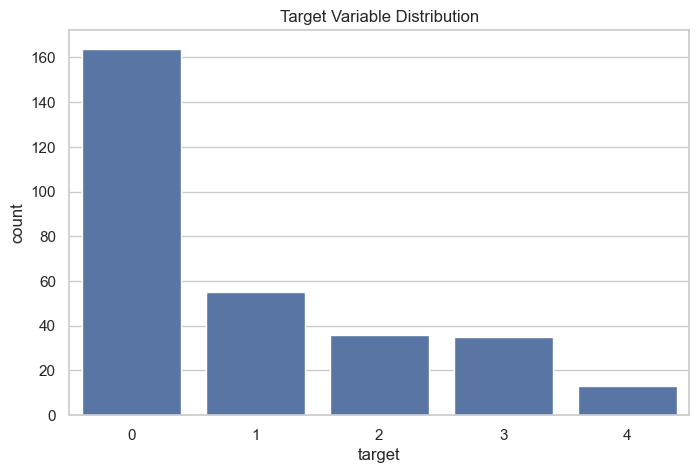

In [17]:
df["target"].value_counts()
sns.countplot(x="target", data=df)
plt.title("Target Variable Distribution")
plt.savefig("../statics/images/target_distribution.png", bbox_inches="tight")
plt.show()

### Target Variable
- The target variable represents heart disease status.
- Original encoding:
  - `0` → No heart disease
  - `1, 2, 3, 4` → Presence of heart disease
- In later steps, the target will be converted into a **binary classification problem**.

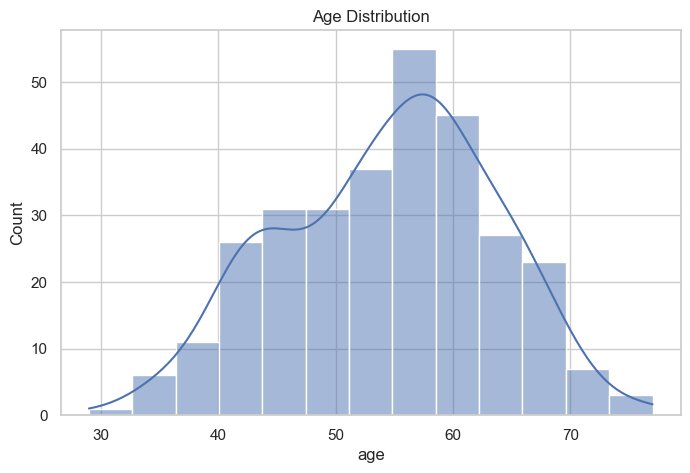

In [19]:
# Age Distribution
sns.histplot(df["age"], kde=True)
plt.title("Age Distribution")
plt.savefig("../statics/images/age_distribution.png", bbox_inches="tight")
plt.show()

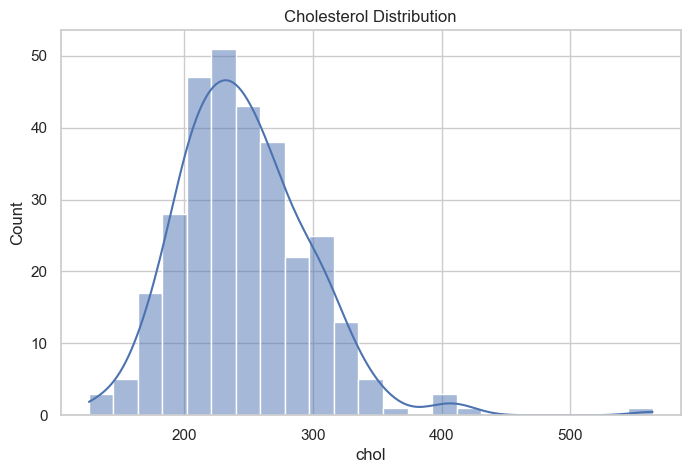

In [20]:
# Cholesterol Distribution
sns.histplot(df["chol"], kde=True)
plt.title("Cholesterol Distribution")
plt.savefig("../statics/images/chol_distribution.png", bbox_inches="tight")
plt.show()

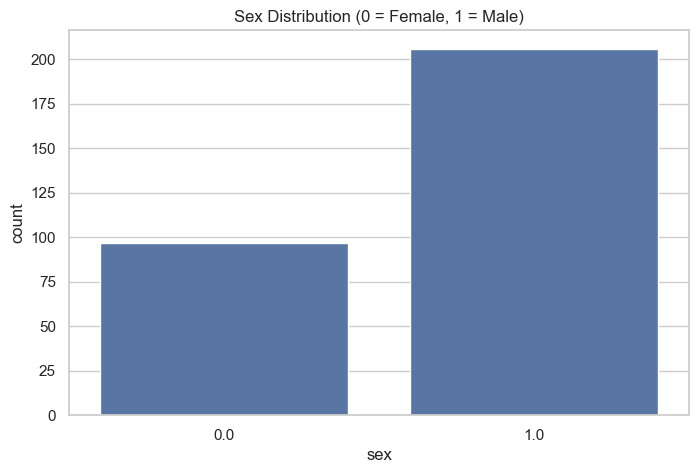

In [21]:
# Sex Distribution
sns.countplot(x="sex", data=df)
plt.title("Sex Distribution (0 = Female, 1 = Male)")
plt.savefig("../statics/images/sex_distribution.png", bbox_inches="tight")
plt.show()

#### For now, we temporarily convert ? to NaN for correlation analysis only.

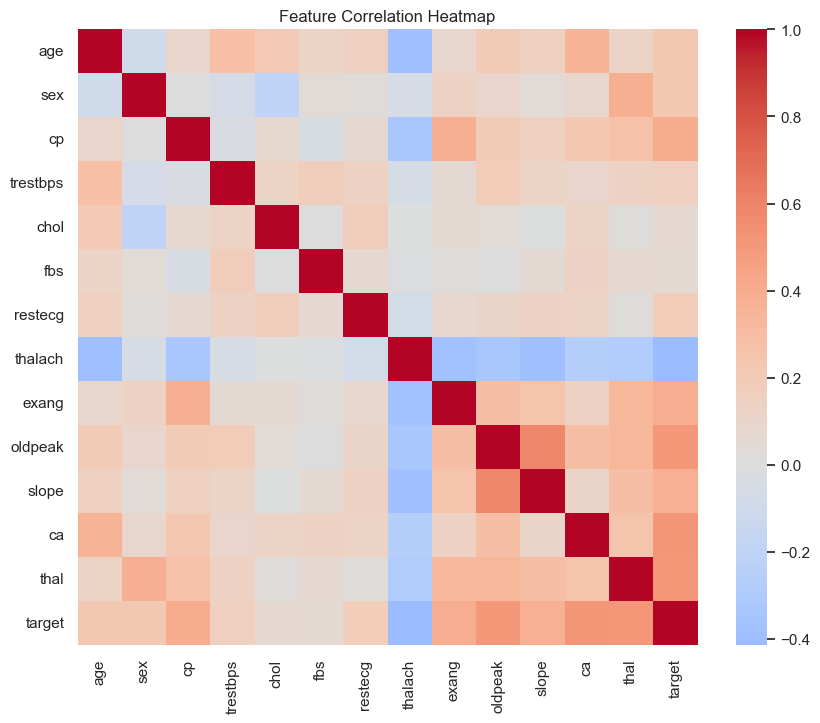

In [22]:
df_corr = df.replace("?", np.nan).astype(float)

corr_matrix = df_corr.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap="coolwarm", center=0)
plt.title("Feature Correlation Heatmap")
plt.savefig("../statics/images/correlation_heatmap.png", bbox_inches="tight")
plt.show()

### Correlation Insights
- Features such as `thalach`, `cp`, and `oldpeak` show noticeable correlation with the target.
- Some features are weakly correlated and may be candidates for removal.
- Feature selection will be addressed in later notebooks.

## Key Findings from EDA

- The dataset is relatively small but well-structured.
- Missing values exist but are limited in number.
- The target variable needs to be binarized.
- Certain features appear more informative than others.
- Further preprocessing and feature engineering are required before model training.

📌 **Next Step:**  
Data cleaning, feature engineering, and creation of `cleaned_data.csv`.